Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,Would_live_in_another_neighborhood,District,Gender,Place_of_birth,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL STAY THE SAME,IT WILL GET WORSE,...,< 50 M2,< 1000 EUROS,MIDDLE-MIDDLE,ONE,0,0,0,0,0,0
1,2008,0.0,CIUTAT VELLA,1,REST OF SPAIN,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL IMPROVE,IT WILL IMPROVE,...,51-100 M2,< 1000 EUROS,LOW,TWO,1,0,0,0,0,0
3,2008,0.0,CIUTAT VELLA,0,REST OF CATALONIA,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL IMPROVE,IT WILL GET WORSE,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
5,2008,0.0,CIUTAT VELLA,0,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL IMPROVE,IT WILL STAY THE SAME,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
6,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,...,51-100 M2,< 1000 EUROS,LOW,ONE,0,0,1,0,0,0


In [5]:
data.shape

(15075, 41)

In [6]:
data.columns.tolist()

['ANY',
 'Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Place_of_birth',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'PARKING',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [7]:
x_var = data.columns.tolist()

In [8]:
for i in ['ANY', 'Would_live_in_another_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport',
          'BCN_citizen_security', 'BCN_management']:
    x_var.remove(i)

In [9]:
x = data[x_var]

In [10]:
y = data['Would_live_in_another_neighborhood']

In [11]:
x = pd.get_dummies(x, drop_first=True)

In [12]:
x.columns.tolist()

['Gender',
 'Owns_a_car',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'Place_of_birth_FOREIGN',
 'Place_of_birth_REST OF CATALONIA',
 'Place_of_birth_REST OF SPAIN',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_evolution_IT HAS IMPROVED',
 'Barri_evolution_IT IS THE SAME',
 'Barri_evolution_IT IS WORSE',
 'Barri_future_IT WILL GET WORSE',
 'Barri_future_IT WILL IMPROVE',
 'Barri_future_IT WILL STAY THE SAME',
 "Barri_satisfaction_of_living_I DON'T KNOW",
 'Barri_satisfaction_of_living_NOT SATISFIED',
 'Barri_satisfaction_of_living_SATISFIED',
 'Barri_citizen_se

In [13]:
x = sm.add_constant(x)

In [14]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.276635
         Iterations 8
                                           Results: Logit
Model:                     Logit                                    Pseudo R-squared:       0.194    
Dependent Variable:        Would_live_in_another_neighborhood       AIC:                    8526.5545
Date:                      2021-05-02 10:05                         BIC:                    9235.2882
No. Observations:          15075                                    Log-Likelihood:         -4170.3  
Df Model:                  92                                       LL-Null:                -5177.0  
Df Residuals:              14982                                    LLR p-value:            0.0000   
Converged:                 1.0000                                   Scale:                  1.0000   
No. Iterations:            8.0000                                                                    
------------------------

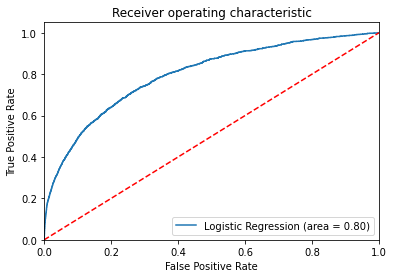

In [15]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [22]:
for i in ['House_size', 'Monthly_family_income', 'Social_class']:
    x_var.remove(i)

In [26]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [27]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277455
         Iterations 7
                                           Results: Logit
Model:                     Logit                                    Pseudo R-squared:       0.192    
Dependent Variable:        Would_live_in_another_neighborhood       AIC:                    8525.2658
Date:                      2021-05-02 10:16                         BIC:                    9134.9292
No. Observations:          15075                                    Log-Likelihood:         -4182.6  
Df Model:                  79                                       LL-Null:                -5177.0  
Df Residuals:              14995                                    LLR p-value:            0.0000   
Converged:                 1.0000                                   Scale:                  1.0000   
No. Iterations:            7.0000                                                                    
------------------------

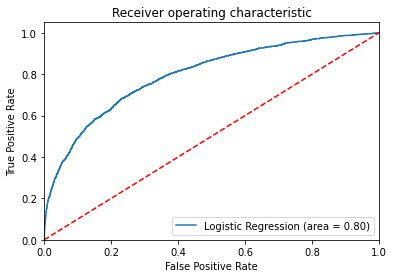

In [30]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [29]:
result.pvalues.sort_values(ascending=False)

SUBWAY_NEITHER BAD, NOR GOOD                    9.870489e-01
ASPHALT AND STREET CONSERVATION_I DON'T KNOW    9.812426e-01
PARKING_NEITHER BAD, NOR GOOD                   9.607222e-01
BCN_over_barri_management                       9.449731e-01
URBANISM_NEITHER BAD, NOR GOOD                  9.174673e-01
                                                    ...     
Barri_comparison_ONE OF THE WORST               6.789841e-10
Barri_satisfaction_of_living_SATISFIED          1.609935e-12
Time_living_in_barri_MORE THAN 10 YEARS         1.074093e-13
Place_of_birth_REST OF SPAIN                    4.682812e-15
Time_living_in_barri_LESS THAN 10 YEARS         8.545862e-34
Length: 80, dtype: float64

In [31]:
for i in ['BCN_over_barri_evolution', 'BCN_over_barri_management', 'Barri_evolution', 'Barri_future',
         'Barri_management', 'STREETS CLEANING', 'URBANISM', 'ASPHALT AND STREET CONSERVATION', 'CIRCULATION',
         'PARKING', 'SUBWAY']:
    x_var.remove(i)

In [32]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [33]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.278786
         Iterations 7
                                         Results: Logit
Model:                    Logit                                  Pseudo R-squared:     0.188    
Dependent Variable:       Would_live_in_another_neighborhood     AIC:                  8507.3879
Date:                     2021-05-02 10:20                       BIC:                  8896.0483
No. Observations:         15075                                  Log-Likelihood:       -4202.7  
Df Model:                 50                                     LL-Null:              -5177.0  
Df Residuals:             15024                                  LLR p-value:          0.0000   
Converged:                1.0000                                 Scale:                1.0000   
No. Iterations:           7.0000                                                                
------------------------------------------------------------------

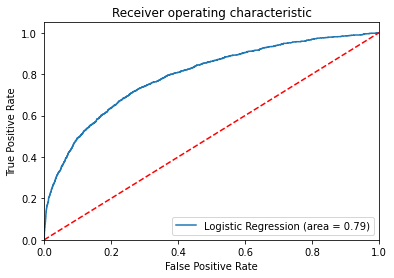

In [35]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [34]:
result.pvalues.sort_values(ascending=False)

BUS_NEITHER BAD, NOR GOOD                           8.933673e-01
BUS_GOOD                                            7.329369e-01
Living_alone_THREE                                  7.184461e-01
Barri_satisfaction_of_living_I DON'T KNOW           7.172573e-01
District_NOU BARRIS                                 7.069150e-01
District_HORTA - GUINARDÓ                           6.731791e-01
Barri_transport_NEITHER BAD, NOR GOOD               6.435933e-01
GREEN AREAS_NEITHER BAD, NOR GOOD                   5.948211e-01
PUBLIC LIGHTING_I DON'T KNOW                        5.666381e-01
District_SANTS - MONTJUÏC                           5.409602e-01
BCN_over_barri_citizen_security                     5.302844e-01
Barri_transport_GOOD                                4.315610e-01
Barri_citizen_security_GOOD                         4.141687e-01
Gender                                              4.002657e-01
MUNICIPAL MARKETS_I DON'T KNOW                      3.986736e-01
Barri_citizen_security_I 

In [38]:
for i in ['BCN_over_barri_citizen_security', 'Barri_citizen_security', 'BUS', 'Barri_transport']:
    x_var.remove(i)

ValueError: list.remove(x): x not in list

In [39]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [40]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.279354
         Iterations 7
                                         Results: Logit
Model:                    Logit                                  Pseudo R-squared:     0.187    
Dependent Variable:       Would_live_in_another_neighborhood     AIC:                  8504.5197
Date:                     2021-05-02 10:23                       BIC:                  8816.9722
No. Observations:         15075                                  Log-Likelihood:       -4211.3  
Df Model:                 40                                     LL-Null:              -5177.0  
Df Residuals:             15034                                  LLR p-value:          0.0000   
Converged:                1.0000                                 Scale:                1.0000   
No. Iterations:           7.0000                                                                
------------------------------------------------------------------

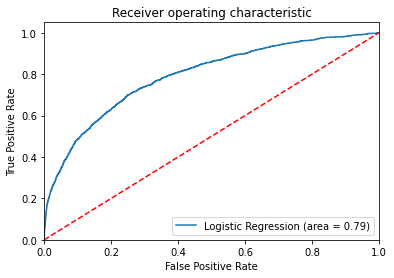

In [41]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [42]:
result.pvalues.sort_values(ascending=False)

District_HORTA - GUINARDÓ                           8.572970e-01
District_NOU BARRIS                                 7.942175e-01
Barri_satisfaction_of_living_I DON'T KNOW           7.476051e-01
GREEN AREAS_NEITHER BAD, NOR GOOD                   7.029751e-01
District_SANTS - MONTJUÏC                           6.893682e-01
Living_alone_THREE                                  6.776546e-01
MUNICIPAL MARKETS_I DON'T KNOW                      5.395262e-01
PUBLIC LIGHTING_I DON'T KNOW                        4.509601e-01
Gender                                              3.795091e-01
District_SANT ANDREU                                1.902794e-01
NOISE_I DON'T KNOW                                  1.384632e-01
Living_alone_TWO                                    9.371915e-02
Barri_comparison_NEITHER THE BEST, NOR THE WORST    8.941718e-02
Place_of_birth_FOREIGN                              7.407975e-02
MUNICIPAL MARKETS_NEITHER BAD, NOR GOOD             6.424976e-02
Living_alone_ONE         

In [43]:
for i in ['Gender']:
    x_var.remove(i)

In [45]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [46]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.279380
         Iterations 7
                                         Results: Logit
Model:                    Logit                                  Pseudo R-squared:     0.186    
Dependent Variable:       Would_live_in_another_neighborhood     AIC:                  8503.2936
Date:                     2021-05-02 10:24                       BIC:                  8808.1253
No. Observations:         15075                                  Log-Likelihood:       -4211.6  
Df Model:                 39                                     LL-Null:              -5177.0  
Df Residuals:             15035                                  LLR p-value:          0.0000   
Converged:                1.0000                                 Scale:                1.0000   
No. Iterations:           7.0000                                                                
------------------------------------------------------------------

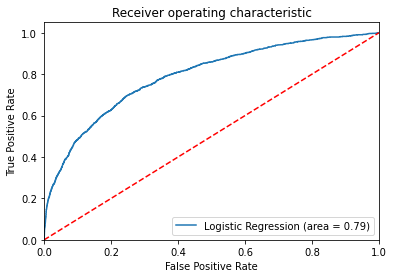

In [47]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [48]:
result.pvalues.sort_values(ascending=False)

District_HORTA - GUINARDÓ                           8.898816e-01
District_NOU BARRIS                                 8.204490e-01
Barri_satisfaction_of_living_I DON'T KNOW           7.427211e-01
District_SANTS - MONTJUÏC                           7.170456e-01
GREEN AREAS_NEITHER BAD, NOR GOOD                   7.135738e-01
Living_alone_THREE                                  6.775333e-01
MUNICIPAL MARKETS_I DON'T KNOW                      5.501763e-01
PUBLIC LIGHTING_I DON'T KNOW                        4.532132e-01
District_SANT ANDREU                                2.033136e-01
NOISE_I DON'T KNOW                                  1.475528e-01
Living_alone_TWO                                    9.409013e-02
Barri_comparison_NEITHER THE BEST, NOR THE WORST    9.300492e-02
Place_of_birth_FOREIGN                              7.388411e-02
MUNICIPAL MARKETS_NEITHER BAD, NOR GOOD             6.503264e-02
Living_alone_ONE                                    5.575286e-02
District_SANT MARTÍ      

In [49]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_live_in_another_neighborhood
Method:                                          dydx
At:                                           overall
                                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Owns_a_car                                           0.0146      0.005      2.837      0.005       0.005       0.025
BCN_over_barri_future                                0.0202      0.006      3.336      0.001       0.008       0.032
BCN_over_barri_satisfaction_of_living                0.0280      0.011      2.664      0.008       0.007       0.049
BCN_over_barri_transport                             0.0239      0.009      2.523      0.012       0.005       0.042
District_EIXAMPLE                                   -0.0433      0.010     -4.281 

In [50]:
result.pred_table()

array([[13322.,   117.],
       [ 1363.,   273.]])

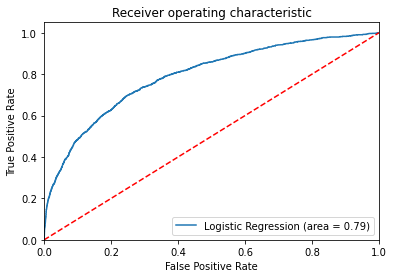

In [51]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()